Sources:
- https://github.com/barbagroup/CFDPython/blob/master/lessons/04_Step_3.ipynb
- Derivation of the Heat Equation: Numerical Methods, Chapra
- https://hplgit.github.io/num-methods-for-PDEs/doc/pub/diffu/sphinx/._main_diffu001.html#the-initial-boundary-value-problem-for-1d-diffusion (has some errors)

## Difussion Equation in 1D (also known as the one dimensional heat diffusion equation)

$$
\frac{\partial u}{\partial t}= \nu \frac{\partial^2 u}{\partial x^2} \tag{1}
$$

where $u(x,t)$ is the unknown velocity function to be solved for, $x$ is a coordinate in space, and $t$ is time. The coefficient $\nu$ is the `kinematic viscocity` and determines how fast the fluid velocity $u$ changes in time. A quick short form for the difussion equation is $u_t = \nu u_{xx}$.

for heat transport problems

$$
\frac{\partial u}{\partial t}= \alpha \frac{\partial^2 u}{\partial x^2} \tag{2}
$$

the coefficient $\alpha$  is the `diffusion coefficient`

Typical diffusion problems may experience rapid change in the very beginning, but then the evolution of $u$ becomes slower and slower. The solution is usually very smooth, and after some time, one cannot recognize the initial shape of u. This is in sharp contrast to solutions of the wave equation where the initial shape is preserved - the solution is basically a moving initial condition. The one-dimensional linear convection equation has solutions that propagates with speed $c$ forever, without changing shape, while the diffusion equation converges to a stationary solution $\bar u(x)$ as $t\rightarrow\infty$. In this limit,  $\frac{\partial u}{\partial t} = 0$ and then $\bar u(x)$ is governed by $\frac{\partial^2 u}{\partial x^2} = 0$. This stationary limit of the diffusion equation is called the Laplace equation and arises in a very wide range of applications throughout the sciences.

It is possible to solve $u(x,t)$ using a explicit scheme, but the time step restrictions soon become much less favorable for an explicit scheme for the 1D linear convection equation. And for more importance, since the solution $u$ of the diffusion equation is very smooth and changes slowly, small-time steps are not convinient and not required by accuracy as the diffusion process converges to a stationary state.





In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.linalg as la

### The initial-boundary value problem for 1D diffusion in heat transport problems (Hans Petter Langtangen example)

To obtain a unique solution of the difusion equation, or equivalently, to apply numerical methods, we need initial and boundary conditions. The diffusion equation goes with one initial condition $u(x,0) = I(x)$, where $I$ is a prescribed function. One boundary condition is required at each point on the boundary, which in 1D means that $u$ must be known, $u_x$ must be known or some combination of them.

We shall start with the simplest boundary condition: $u=0$. The complete initial-boundary value diffusion problem in one space dimension can then be specified as

$$
\frac{\partial u}{\partial t} = {\alpha} \frac{\partial^2 u}{\partial x^2}, \quad x\in (0,L),\ t\in (0,T] 
$$ 

Initial conditions in $t=0$

$$
u(x,0) = I(x), \quad  x\in [0,L]
$$

left boundary condition in x=0

$$
\begin{split}
u(0,t)  = 0, \quad  t>0,\end{split} 
$$

right boundary condition in x=L

$$
\begin{split}
u(L,t)  = 0, \quad  t>0{\thinspace .}\end{split}
$$

Eq. (3) is known as a one-dimensional heat diffusion equation. With only a first-order derivative in time, only one initial condition is needed, while the second-order derivative in space leads to a demand for two boundary conditions.

#### Forward Euler scheme

The first step in the discretization procedure is to replace the domain $[0,L] \times [0,T]$ by a set of equally spaced mesh points then:

$$
x_i=i\Delta x,\quad i=0,\ldots,N_x,
$$

and

$$
t_n=n\Delta t,\quad n=0,\ldots,N_t {\thinspace .}
$$

With forward time discretization and second order central discretization for space:

$$
\frac{u^{n+1}_i-u^n_i}{\Delta t} = {\alpha} \frac{u^{n}_{i+1} - 2u^n_i + u^n_{i-1}}{\Delta x^2} {\thinspace }
$$

Solving for the only unknown $u_{i}^{n+1}$

$$u_{i}^{n+1}=u_{i}^{n}+\frac{\alpha \Delta t}{\Delta x^2}(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}) \tag {3}$$ 

For calculations we define: 

$$F = \frac{\alpha \Delta t}{\Delta x^2} $$

 ### Solution strategy for explicit scheme
 
1. Compute $u^0_i=I(x_i)$ for $i=0,\ldots,N_x$
2. for $n=0,1,\ldots,N_t$
    1. apply Eq. (3) for all the internal spatial points $i=1,\ldots,N_x-1$ 
    2. set the boundary values $u^{n+1}_i=0$ for $i=0$ and $i=N_x$

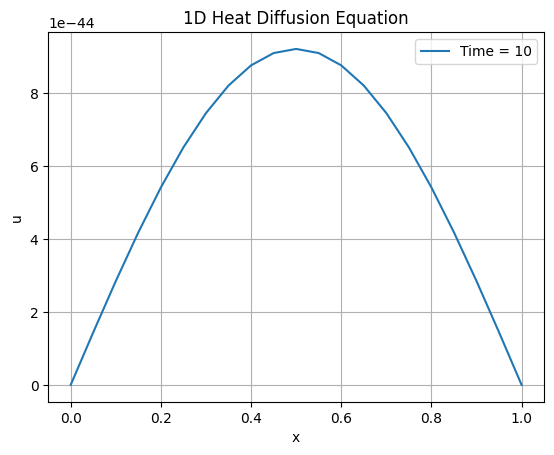

In [12]:
def one_d_heat_diffusion(I, a, L, Nx, f, T):
    """
    f <= 0.5 for stability
    """
    t0 = time.process_time()
    # mesh points in space
    x = np.linspace(0, L, Nx+1)
    dx = x[1] - x[0]
    dt = (f*dx**2)/a
    Nt = int(round(T/float(dt)))
    t = np.linspace(0, T, Nt+1)
    u = np.zeros(Nx+1)
    u_1 = np.zeros(Nx+1)
    
    #set initial condition u(x,0) = I(x)
    for i in range(0, Nx+1):
        u_1[i] = I(x[i])
        
    for n in range(0, Nt):
        # Compute u at inner mesh points
        for i in range(1, Nx):
            u[i] = u_1[i] + f*(u_1[i-1]-2*u_1[i] + u_1[i+1])
            
        # Insert boundary conditions
        u[0] = 0
        u[Nx] = 0
        
        # Switch variables before next step
        u_1, u = u, u_1
        
    t1 = time.process_time()
    return u, x ,t, t1-t0

        
# Define an initial condition function
def initial_condition(x):
    return np.sin(np.pi*x)

# Parameters
L = 1.0     # Length of the domain
T = 10     # Total time
Nx = 20     # Number of spatial points
a = 1.0     # Diffusion coefficient
f = 0.5     # Stability criterion
    
u, x, t, enlapsed_time = one_d_heat_diffusion(initial_condition, a, L, Nx, f, T)

plt.plot(x, u, label=f'Time = {T}')
plt.xlabel('x')
plt.ylabel('u')
plt.title('1D Heat Diffusion Equation')
plt.legend()
plt.grid()
plt.show()

### Explicit scheme (Barba example)

Consider a forward scheme for the change of the velocity in time and a central second order differential scheme for the double change of the velocity in the space.

$$
\frac{\partial ^2 u}{\partial x^2}=\frac{u_{i+1}-2u_{i}+u_{i-1}}{\Delta x^2} + O(\Delta x^2) 
$$

$$
\frac{\partial u}{\partial t} = \frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t} + O(\Delta x) 
$$

$$
\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\nu\frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\Delta x^2}
$$

$$
u_{i}^{n+1}=u_{i}^{n}+\frac{\nu\Delta t}{\Delta x^2}(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}) \tag{4}
$$

Defining a Courant Number with the constants in Eq. (3) as $\sigma$  

$$
\sigma = \frac{\nu\Delta t}{\Delta x^2} 
$$

now, 
$$\Delta t = \frac{\sigma \Delta x^2}{\nu} $$

For calculations we define 

$$F = \frac{\nu\Delta t}{\Delta x^2} $$

#### Solution strategy for explicit scheme

Adopting the functional solution developed in `courantNumber` notebook, 'linearconvCN' function with similiar initial conditions of, at $t = 0, u = 2$ in the interval $0.5 \le x \le 1$ and $u = 1$ everywhere else. That means that the left boundary condition x = 0, and the right boundary condition x = L = 2 both are equal to $u=1$.

In [19]:
total_x_length = 2
number_of_timesteps = 100
nu = 0.3

def one_d_difussion(number_of_grid_points_x, sigma):
    
    # creating the computational grid
    x = np.linspace(0, total_x_length, num=number_of_grid_points_x)
    
    # initializing the boundary conditions array u^0
    u = np.ones(number_of_grid_points_x)
    
    # populating the boundary conditions array, for u^0
    # setting u=2 between x = 0.5 and x = 1, with u = 1 for every else x
    u[(x >= 0.5) & (x <= 1)] = 2
    
    # x step size
    dx = total_x_length / (number_of_grid_points_x - 1)
    
    # define dt with sigma 
    dt = (sigma*dx**2)/nu
    
    # initializing F 
    f = nu*dt/dx**2
    
    # initializing an auxiliar array of ones for the calculation
    un = np.ones(number_of_grid_points_x)
    
    # defining a results matrix (+1 rows to store the initial conditions)
    rows = number_of_timesteps
    columns = number_of_grid_points_x
    results = np.empty((rows+1, columns))
    
    # storing in the results the initial conditions
    results[0, :] = u
    
    for n in range(number_of_timesteps):
        un = u.copy()
        for i in range(1, number_of_grid_points_x-1):
            u[i] = un[i] + f*(un[i+1]-2*un[i]+un[i-1])
        results[n+1, :] = u
        
    fig, axs = plt.subplots(10, sharex=True, sharey=True)
    fig.suptitle('1D Diffusion (Barba example)', fontsize=20)

    for i in range(0,10):
        axs[i].plot(np.linspace(0, total_x_length+dx, number_of_grid_points_x), results[i*10,:])

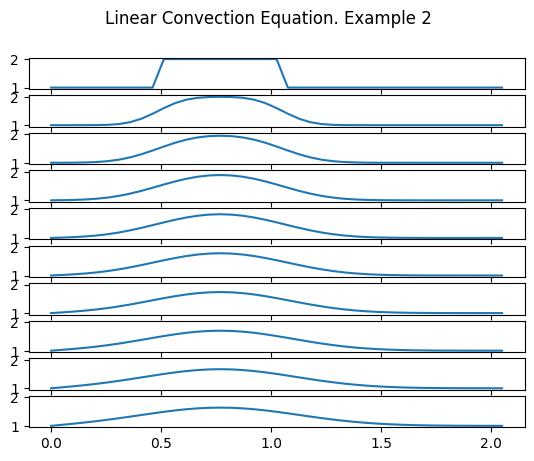

In [20]:
one_d_difussion(41, sigma=0.2)

### Implicit scheme for backward differential approximation 
$$
\frac{u^{n}_i-u^{n-1}_i}{\Delta t} = {\alpha}\frac{u^{n}_{i+1} - 2u^n_i + u^n_{i-1}}{\Delta x^2} {\thinspace .} \tag{6}
$$



 Selecting a subset of $ i=0,\ldots,N_x$, that is: $i=1,\ldots,Nx-1$ that take count of the internal points of a sparce matrix of size $(N_x-1)\times (N_x-1)$ and collecting all the unkowns in Eq. (6) the next expression can be written

$$
- F u^n_{i-1} + \left(1+  2F \right) u^{n}_i - F u^n_{i+1} =
    u_{i}^{n-1} \tag{7}
$$

Where $F = {\alpha}\frac{\Delta t}{\Delta x^2}$

Taking count the boundary conditions for x that in this case are $u_0^n = 0$ and $u_{N_x}^n = 0$ and the Eq. (7) the next system of linear equations can be written 

$$
AU = b
$$

Where A is a $(N_x \times N_x)$ matrix,


$$
\begin{split}\tag{19}
A =
    \left(
    \begin{array}{cccccccccc}
    A_{0,0} & A_{0,1} & 0
    &\cdots &
    \cdots & \cdots & \cdots &
    \cdots & 0 \\
    A_{1,0} & A_{1,1} & 0 & \ddots &   & &  & &  \vdots \\
    0 & A_{2,1} & A_{2,2} & A_{2,3} &
    \ddots & &  &  & \vdots \\
    \vdots & \ddots &  & \ddots & \ddots & 0 &  & & \vdots \\
    \vdots &  & \ddots & \ddots & \ddots & \ddots & \ddots & & \vdots \\
    \vdots & &  & 0 & A_{i,i-1} & A_{i,i} & A_{i,i+1} & \ddots & \vdots \\
    \vdots & & &  & \ddots & \ddots & \ddots &\ddots  & 0 \\
    \vdots & & & &  &\ddots  & \ddots &\ddots  & A_{N_x-1,N_x} \\
    0 &\cdots & \cdots &\cdots & \cdots & \cdots  & 0 & A_{N_x,N_x-1} & A_{N_x,N_x}
    \end{array}
    \right)\end{split}
$$

the nonzero elements of matrix $A$ are:

$$
\begin{eqnarray}
A_{i,i-1} = -F \\
A_{i,i} = 1 + 2F \\
A_{i,i+1} = -F
\end{eqnarray}
$$

the equations for internal points $i=1,\ldots,N_x-1$ are: 

$$
\begin{eqnarray}
A_{0,0} = 1 \\
A_{0,1} = 0 \\
A_{N_x,N_x-1} = 0 \\
A_{N_x,N_x} = 1
\end{eqnarray}
$$

U is a vector that represents the unknown velocities in each point of the x computational domain

$$
U=(u^n_0,\ldots,u^n_{N_x})
$$

and

$$
\begin{split}
b = \left(\begin{array}{c}
    b_0\\
    b_1\\
    \vdots\\
    b_i\\
    \vdots\\
    b_{N_x}
    \end{array}\right)
\end{split} 
$$

here are contained the boundary conditions and the initial conditions in the first time step, then $b$ must be uptated to the calculated solution of the velocity. In this case for t = 0 it must contain the initial conditions

$$
\begin{eqnarray}
b_0 = 0 \\
b_i = u^{n-1}_i,\quad i=1,\ldots,N_x-1 \\
b_{N_x} = 0
\end{eqnarray}
$$

### Case 1.

- L = 1.0     # Length of the domain
- T = 10     # Total time
- Nx = 20     # Number of spatial points
- a = 1.0     # Diffusion coefficient
- f = 0.5     # Stability criterion




In [23]:
def backward_one_d_heat_diffusion(I, a, L, Nx, F, T):
    
    t0 = time.process_time()
    x = np.linspace(0, L, Nx+1)
    dx = x[1] - x[0]
    dt = (F*dx**2)/a
    Nt = int(round(T/float(dt)))
    t = np.linspace(0, T, Nt+1)
    u = np.zeros(Nx+1)
    u_1 = np.zeros(Nx+1)
    
    # Data structures for the linear system
    A = np.zeros((Nx+1, Nx+1))
    b = np.zeros(Nx+1)
    
    for i in range(1, Nx):
        A[i, i-1] = -F
        A[i, i+1] = -F
        A[i, i] = 1 + 2*F
    
    A[0,0] = 1
    A[Nx, Nx] = 1
       
    print(A)   
        
    # set initial condition u(x,0) = I(x)
    for i in range(0, Nx+1):
        u_1[i] = I(x[i])
        
    for n in range(0, Nt):
        # Compute b and solve linear system
        for i in range(1, Nx):
            b[i] = u_1[i]
        print(b)    
            
        b[0] = 0
        b[Nx] = 0
        u[:] = la.solve(A, b)
        
        # update u_1 before next step
        u_1, u = u, u_1
    
    
    t1 = time.process_time()
    return u, x, t, t1-t0


In [24]:
# Define an initial condition function
def initial_condition_b(x):
    return np.sin(np.pi*x)

# Parameters
L = 1.0     # Length of the domain
T = 5     # Total time
Nx = 10     # Number of spatial points
a = 1.0     # Diffusion coefficient
f = 0.5     # Stability criterion
    
u, x, t, enlapsed_time = backward_one_d_heat_diffusion(initial_condition_b, a, L, Nx, f, T)


[[ 1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-0.5  2.  -0.5  0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -0.5  2.  -0.5  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -0.5  2.  -0.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -0.5  2.  -0.5  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -0.5  2.  -0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.5  2.  -0.5  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.5  2.  -0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -0.5  2.  -0.5  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.  -0.5  2.  -0.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1. ]]
[0.         0.30901699 0.58778525 0.80901699 0.95105652 1.
 0.95105652 0.80901699 0.58778525 0.30901699 0.        ]
[0.         0.29459833 0.56035932 0.77126843 0.90668042 0.95334021
 0.90668042 0.77126843 0.56035932 0.29459833 0.        ]
[0.         0.28085243 0.53421307 0.73528121 0.8643749  0.90885755
 0.8643749  0.73528121 0.53421307 0.28085243 0.       

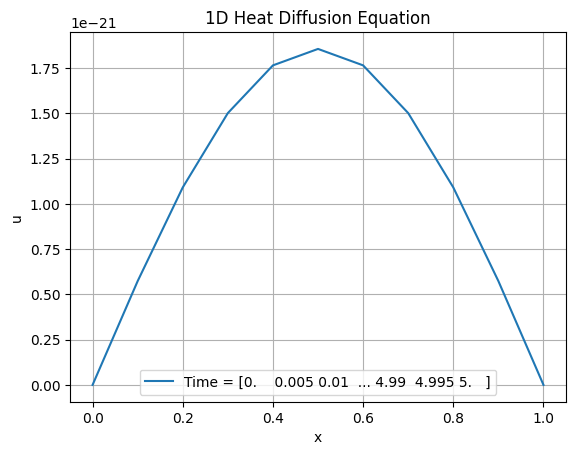

In [25]:
plt.plot(x, u, label=f'Time = {t}')
plt.xlabel('x')
plt.ylabel('u')
plt.title('1D Heat Diffusion Equation')
plt.legend()
plt.grid()
plt.show()